In [1]:
import networkx as nx
import pandas as pd
import re

coronavirus = pd.read_csv('#coronavirus_tweets_1_28.csv').drop('Unnamed: 0', axis=1)
wuhan = pd.read_csv('wuhan_tweets1-29.csv').drop('Unnamed: 0', axis=1)

tweets = coronavirus.append(wuhan).drop('date', axis=1).drop_duplicates()
tweets.head(5)

,username,to,text,retweets,favorites,mentions,hashtags,geo,newdate
0,USAOmbudsman,NaN,They know as much about medicine as they do ab...,0,0,NaN,#QAnon #Coronavirus #bigdummies #MAGA,NaN,2020-1-29
1,ktikariza,NaN,"Señores para qué #coronavirus en Colombia, si ...",23,84,NaN,#coronavirus,NaN,2020-1-29
2,LejournalFR,NaN,#coronavirus Urgent La commission nationale d...,7,7,NaN,#coronavirus #Chine #Tibet #Chine,NaN,2020-1-29
3,OttoBismarck00,NaN,"Resmi açıklamaya göre ölü sayısı 170, vaka sa...",0,0,NaN,#coronavirus,NaN,2020-1-29
4,Alfred_Research,NaN,Grants for epilepsy and multiple sclerosis res...,0,0,@Alfred_Research,#coronavirus,NaN,2020-1-29


In [23]:
edges = tweets[['username','to']]
edges = edges.ffill(axis=1)
edges['text'] = tweets['text']

In [24]:
G = nx.convert_matrix.from_pandas_edgelist(edges, 'username','to', create_using=nx.DiGraph) 

In [25]:
betweenness = nx.betweenness_centrality(G)
degree = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)

In [43]:
betweenness_dict = {k: v*100000 for k, v in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)}

In [44]:
#{k: v for k, v in sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True)[:25]}

In [45]:
betweenness_df = pd.DataFrame(betweenness_dict.items())
betweenness_df.columns = ["Name","Betweenness"]
#betweenness_df.head()

In [2]:
classes = pd.read_csv('AllPeriod.csv')
#classes.head()

In [47]:
merged_bet = betweenness_df.merge(classes, left_on = "Name", right_on = "Name")
merged_bet = merged_bet.drop_duplicates()

In [48]:
merged_bet.groupby("Class")["Betweenness"].mean().sort_values(ascending=False)

Class
N    0.000296
S    0.000253
O    0.000000
Name: Betweenness, dtype: float64

In [50]:
degree_dict = {k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)}

In [49]:
#{k: v for k, v in sorted(degree.items(), key=lambda item: item[1], reverse=True)[:25]}

In [51]:
#pd.DataFrame(degree_dict.items())

In [52]:
betweenness_df = pd.DataFrame(degree_dict.items())
betweenness_df.columns = ["Name","Degree"]

merged_bet = betweenness_df.merge(classes, left_on = "Name", right_on = "Name")
merged_bet = merged_bet.drop_duplicates()

print("Degree")
merged_bet.groupby("Class")["Degree"].mean().sort_values(ascending=False)

Degree


Class
N    0.000877
S    0.000169
O    0.000097
Name: Degree, dtype: float64

In [53]:
closeness_dict = {k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)}

In [54]:
#{k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)[:25]}

In [55]:
#pd.DataFrame(closeness_dict.items())

In [56]:
betweenness_df = pd.DataFrame(closeness_dict.items())
betweenness_df.columns = ["Name","Closeness"]

merged_bet = betweenness_df.merge(classes, left_on = "Name", right_on = "Name")
merged_bet = merged_bet.drop_duplicates()

print("closeness")
merged_bet.groupby("Class")["Closeness"].mean().sort_values(ascending=False)

closeness


Class
N    0.000795
S    0.000071
O    0.000000
Name: Closeness, dtype: float64

### create graph network

In [3]:
merged_df = tweets.merge(classes, left_on = "username", right_on = "Name")

In [4]:
pd.set_option('display.max_rows', 500)
merged_df.shape

(84, 11)

In [5]:
clean_df = merged_df.ffill(axis = 1)
clean_df.shape

(84, 11)

In [9]:
G = nx.from_pandas_edgelist(clean_df, "username", "to", edge_attr = "retweets", create_using = nx.MultiGraph())

### color map: blue = news, green = scientist, black = other, grey = classified node tweets to someone unclassified 

In [10]:
color_map = []
num_nodes = []

def create_color_map(G):
    for node in G:
        num_nodes.append(node)
        #print(node)
        node_class = clean_df[clean_df["username"] == node]["Class"].unique()
        if len(node_class) == 1:
            if node_class[0] == "S":
                color_map.append("green")
            elif node_class[0] == "N":
                color_map.append("blue")
            else:
                color_map.append("black")
        if len(node_class) == 0:
            color_map.append("grey")
        #print(node_class)
        #print(len(node_class))
                
create_color_map(G)

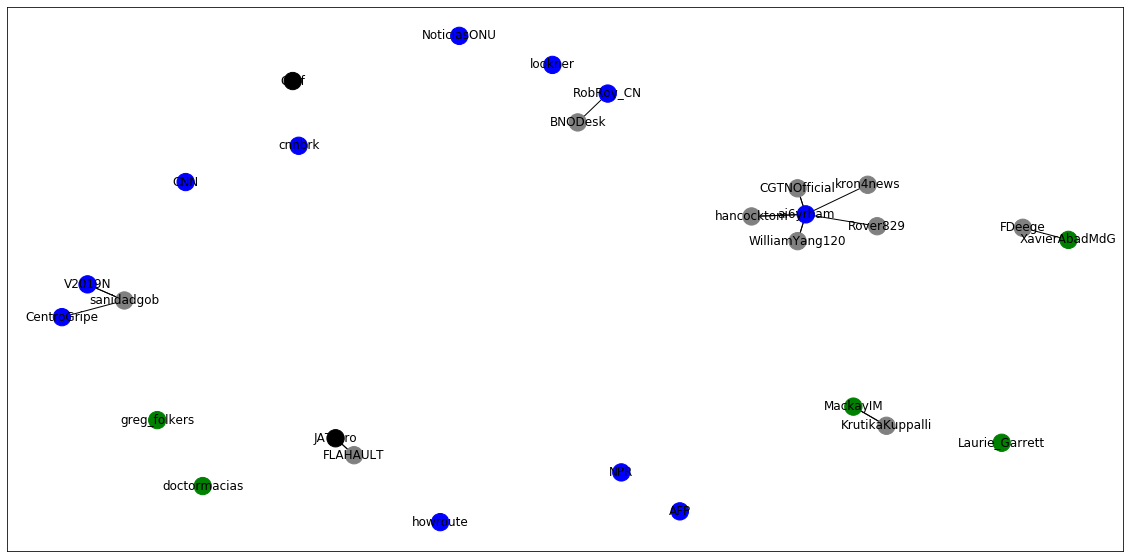

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20,10))

pos = nx.spring_layout(G, iterations = 30)
nx.draw_networkx(G, pos, node_color=color_map)

plt.show()